In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

from lamom.proportions import kMoment

In [2]:
T = 5
dur = 5
filename = f'simulations_estimate/reg_res_03_{T}_{dur}.txt'

estimate_res = np.zeros((100, 4))
estimate_k2 = np.zeros((100, 22))
estimate_k3 = np.zeros((100, 22))

with open(filename,"r") as f:
    c = 0
    i = 0
    for line in f:
        temp_data = np.array(list(map(float, line.split())))
        if c % 3 == 0:
            estimate_res[i] = temp_data
        if c % 3 == 1:
            estimate_k2[i] = temp_data
        if c % 3 == 2:
            estimate_k3[i] = temp_data 
            i += 1
        c += 1

In [3]:
exp = kMoment(1000)
exp.sample([0.7]*22, [1]*22, [1]*22, np.linspace(1, 2, 22))
s = exp.model.get_prop_per_gen(dur)
true_k2 = exp.model.get_k2(s, T, dur)
true_k3 = -exp.model.get_k3(s, T, dur) 
# There is a mismatch between simulations and QUAP new version.
# New version of QUAP require k-statistics of proportions of 
# population that admixed once. However, older version
# used proportion of population, that contributed migrants for several generations.
# k2-stats are the same for both admixture proportions,
# k1-stat changes to 1 - k1-stat,
# k3-stat changes to -k3-stat.

Your k-statistics (sorted by length):
Length (M.)	k_1	k_2	k_3
1.00	0.70000000	1.00000000	1.00000000
1.05	0.70000000	1.00000000	1.00000000
1.10	0.70000000	1.00000000	1.00000000
1.14	0.70000000	1.00000000	1.00000000
1.19	0.70000000	1.00000000	1.00000000
1.24	0.70000000	1.00000000	1.00000000
1.29	0.70000000	1.00000000	1.00000000
1.33	0.70000000	1.00000000	1.00000000
1.38	0.70000000	1.00000000	1.00000000
1.43	0.70000000	1.00000000	1.00000000
1.48	0.70000000	1.00000000	1.00000000
1.52	0.70000000	1.00000000	1.00000000
1.57	0.70000000	1.00000000	1.00000000
1.62	0.70000000	1.00000000	1.00000000
1.67	0.70000000	1.00000000	1.00000000
1.71	0.70000000	1.00000000	1.00000000
1.76	0.70000000	1.00000000	1.00000000
1.81	0.70000000	1.00000000	1.00000000
1.86	0.70000000	1.00000000	1.00000000
1.90	0.70000000	1.00000000	1.00000000
1.95	0.70000000	1.00000000	1.00000000
2.00	0.70000000	1.00000000	1.00000000


/Users/mikhailshishkin/opt/miniconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


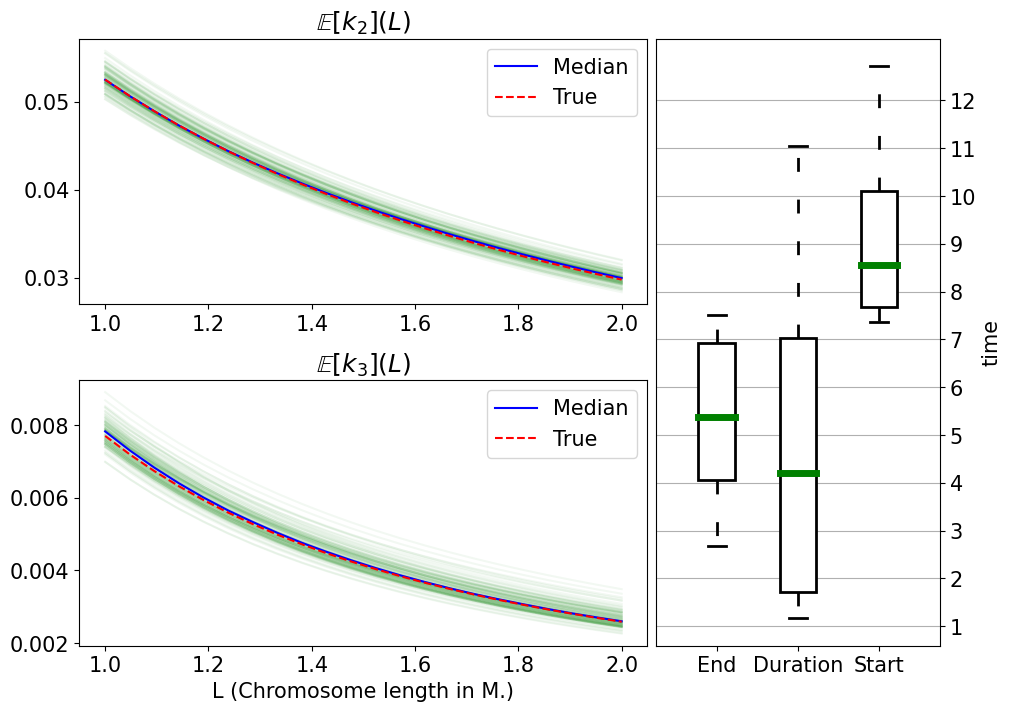

In [4]:
plt.rcParams['font.size'] = 15

def plot_reg_line(ax, x, data, true):
    upper_bound = np.max(data, axis=0)
    median = np.median(data, axis=0)
    lower_bound = np.min(data, axis=0)
    # ax.fill_between(x, lower_bound, upper_bound, color='green', alpha=0.1, label='estimation area??')
    
    for i in range(data.shape[0]):
        ax.plot(x, data[i, :], 'g-', alpha=0.05)
    ax.plot(x, median, 'b', label='Median')
    ax.plot(x, true, 'r--', label='True')

def boxplot_make_up(bp):
    for median in bp['medians']:
        median.set_color('green')
        median.set_linewidth(5)
    for mean in bp['means']:
        mean.set_color('green')
        mean.set_marker('o')
    for boxes in bp['boxes']:
        boxes.set_color('white')
        boxes.set_edgecolor('black')
        boxes.set_linewidth(2)
    for whiskers in bp['whiskers']:
        whiskers.set_linestyle((0, (5, 10)))
        whiskers.set_linewidth(2)
    for caps in bp['caps']:
        caps.set_linewidth(2)

upper_bound_k3 = np.max(estimate_k3, axis=0)
median_k3 = np.median(estimate_k3, axis=0)
lower_bound_k3 = np.min(estimate_k3, axis=0)


x = np.linspace(1, 2, 22)

fig = plt.figure(layout="constrained", figsize=(10, 7))

gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[:, 2])

plot_reg_line(ax1, x, estimate_k2, true_k2)
plot_reg_line(ax2, x, estimate_k3, true_k3)

ax1.set_title('$\mathbb{E}[k_2](L)$')
ax2.set_title('$\mathbb{E}[k_3](L)$')
ax2.set_xlabel('L (Chromosome length in M.)')


T_end = estimate_res[:, 2] + estimate_res[:, 1] - 1
bp = ax3.boxplot(estimate_res[:, 1:3], positions=[0, 1/3], patch_artist=True, showmeans=False)
bp_end = ax3.boxplot(T_end, positions=[2/3], patch_artist=True, showmeans=False)
boxplot_make_up(bp)
boxplot_make_up(bp_end)
ax3.set_xlim([-1/4, 2/3+1/4])

ax3.grid(axis='y')
# ax3.set_yticks([0, 1, 2, 3, 4, 5])
ax3.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# ax3.set_yticks([0, 5, 10, 15, 20, 25])
# ax3.set_yticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
# ax3.set_yticks([1, 2, 3, 5, 7.5, 10, 12.5, 15])
# ax3.set_yticks([2.5, 5, 7.5, 10, 12.5, 15])
ax3.set_xticklabels(['End', 'Duration', 'Start'])
ax3.set_ylabel('time')
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.plot()
ax1.legend()
ax2.legend()

Text(1.52, 28.125, '(C)')

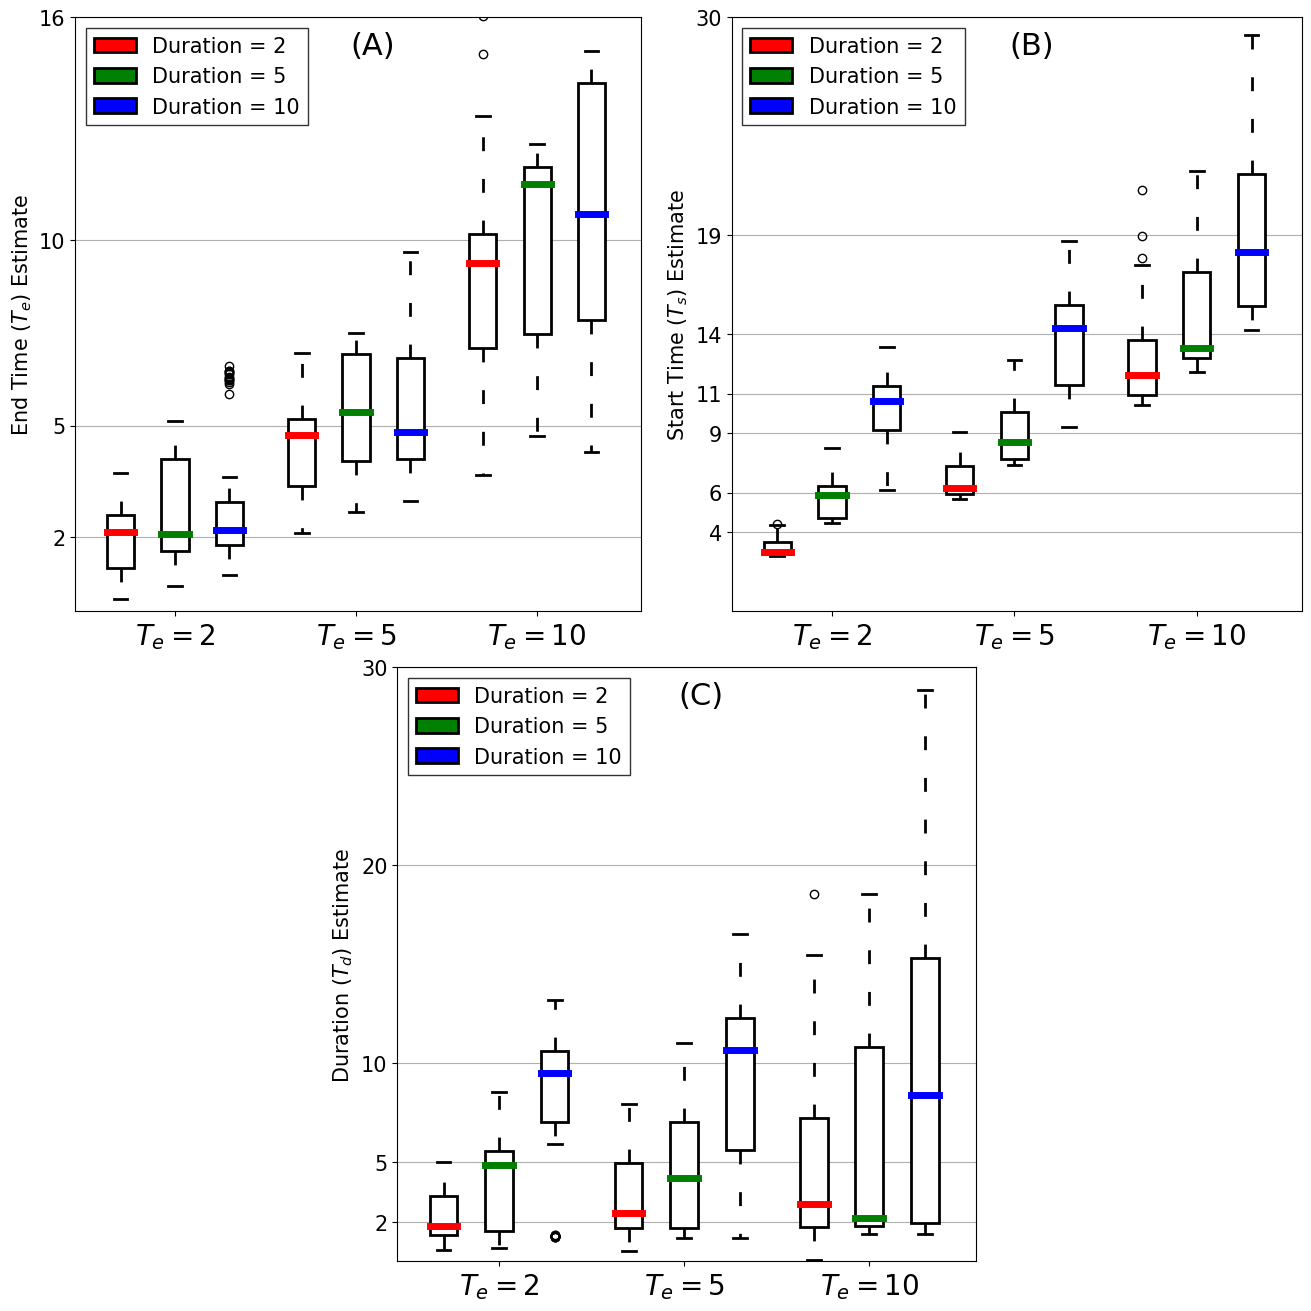

In [5]:
fig = plt.figure(layout="constrained", figsize=(13, 13))

plt.rcParams['font.size'] = 15

gs = GridSpec(4, 4, figure=fig)
axs = [fig.add_subplot(gs[:2, :2]), fig.add_subplot(gs[:2, 2:]), fig.add_subplot(gs[2:, 1:3])]

Ts = [2, 5, 10]
durs = [2, 5, 10]

colors = ['red', 'green', 'blue']
width = 1/3 * len(durs)

for i, T in enumerate(Ts):
    for j, dur in enumerate(durs):
        filename = f'simulations_estimate/reg_res_03_{T}_{dur}.txt'

        estimate_res = np.zeros((100, 4))
        estimate_k2 = np.zeros((100, 22))
        estimate_k3 = np.zeros((100, 22))

        with open(filename,"r") as f:
            c = 0
            k = 0
            for line in f:
                temp_data = np.array(list(map(float, line.split())))
                if c % 3 == 0:
                    estimate_res[k] = temp_data
                if c % 3 == 1:
                    estimate_k2[k] = temp_data
                if c % 3 == 2:
                    estimate_k3[k] = temp_data 
                    k += 1
                c += 1
                
        T_estimate = estimate_res[:, 1]
        dur_estimate = estimate_res[:, 2]
        end_estimate = estimate_res[:, 2] + estimate_res[:, 1] - 1
                
        bp = axs[1].boxplot(end_estimate, positions=[width/4 + width*i + 0.9*j*width/len(durs)],
                   patch_artist=True, showfliers=True)
        for median in bp['medians']:
            median.set_color(colors[j])
            median.set_linewidth(5)
        for boxes in bp['boxes']:
            boxes.set_color('white')
            boxes.set_edgecolor('black')
            boxes.set_linewidth(2)
        for whiskers in bp['whiskers']:
            whiskers.set_linestyle((0, (5, 10)))
            whiskers.set_linewidth(2)
        for caps in bp['caps']:
            caps.set_linewidth(2)
            
        bp = axs[0].boxplot(estimate_res[:, 1], positions=[width/4 + width*i + 0.9*j*width/len(durs)],
                   patch_artist=True, showfliers=True)
        for median in bp['medians']:
            median.set_color(colors[j])
            median.set_linewidth(5)
        for boxes in bp['boxes']:
            boxes.set_color('white')
            boxes.set_edgecolor('black')
            boxes.set_linewidth(2)
        for whiskers in bp['whiskers']:
            whiskers.set_linestyle((0, (5, 10)))
            whiskers.set_linewidth(2)
        for caps in bp['caps']:
            caps.set_linewidth(2)
            
        bp = axs[2].boxplot(dur_estimate, positions=[width/4 + width*i + 0.9*j*width/len(durs)],
                   patch_artist=True, showfliers=True)
        for median in bp['medians']:
            median.set_color(colors[j])
            median.set_linewidth(5)
        for boxes in bp['boxes']:
            boxes.set_color('white')
            boxes.set_edgecolor('black')
            boxes.set_linewidth(2)
        for whiskers in bp['whiskers']:
            whiskers.set_linestyle((0, (5, 10)))
            whiskers.set_linewidth(2)
        for caps in bp['caps']:
            caps.set_linewidth(2)
            
        patches = [mpatches.Patch(label=f'Duration = {durs[i]}', color=colors[i], linewidth=2)
                   for i in range(len(durs))]
        for patch in patches:
            patch.set_edgecolor('black')


        legend = axs[0].legend(handles=patches, ncol=1, fontsize=15,
                           edgecolor='black', fancybox=False, loc='upper left')
        legend = axs[1].legend(handles=patches, ncol=1, fontsize=15,
                   edgecolor='black', fancybox=False, loc='upper left')
        legend = axs[2].legend(handles=patches, ncol=1, fontsize=15,
           edgecolor='black', fancybox=False, loc='upper left')
        
# 1
yticks = Ts
ylim = 16
axs[0].grid(axis='y')
axs[0].set_yticks(Ts+[ylim])
axs[0].set_ylim(0, ylim)
axs[0].set_xticks([width/4 + width*0.9/len(durs)*(len(durs)-1)/2 + x*width for x in range(0, len(Ts))])
axs[0].set_xlim(0, width*len(Ts)+0.125*width)
axs[0].set_ylabel("End Time ($T_e$) Estimate")

# 2
yticks = durs
ylim = 30
axs[1].grid(axis='y')
axs[1].set_yticks([4, 6, 11, 9, 14, 19, ylim])
axs[1].set_ylim(0, ylim)
axs[1].set_xticks([width/4 + width*0.9/len(durs)*(len(durs)-1)/2 + x*width for x in range(0, len(Ts))])
axs[1].set_xlim(0, width*len(Ts)+0.125*width)
axs[1].set_ylabel("Start Time ($T_s$) Estimate")

# 3
yticks = durs
ylim = 30
axs[2].grid(axis='y')
axs[2].set_yticks([2, 5, 10, 20, ylim])
axs[2].set_ylim(0, ylim)
axs[2].set_xticks([width/4 + width*0.9/len(durs)*(len(durs)-1)/2 + x*width for x in range(0, len(Ts))])
axs[2].set_xlim(0, width*len(Ts)+0.125*width)
axs[2].set_ylabel("Duration ($T_d$) Estimate")


axs[0].set_xticklabels(['$T_e=2$', '$T_e=5$', '$T_e=10$'], fontsize=20)
axs[1].set_xticklabels(['$T_e=2$', '$T_e=5$', '$T_e=10$'], fontsize=20)
axs[2].set_xticklabels(['$T_e=2$', '$T_e=5$', '$T_e=10$'], fontsize=20)


axs[0].text(1.52, 15, '(A)', fontsize=22)
axs[1].text(1.52, 15/16*30, '(B)', fontsize=22)
axs[2].text(1.52, 15/16*30, '(C)', fontsize=22)